## Necessary Library for Reading and Analysing Data

#project name:- Titanic Data Analysis Using ML.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [205]:
# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv('Titanic.csv')

In [206]:
# Printing the first 5 rows of the dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
data.groupby('Pclass')[['Age']].get_group(3)

,Age
0,22.0
2,26.0
4,35.0
5,NaN
7,2.0
...,...
882,22.0
884,25.0
885,39.0
888,NaN


In [208]:
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [209]:
data.groupby(['Sex', 'Pclass'])['Survived'].aggregate('mean').unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [210]:
data.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#multilevel pivot-table

In [211]:
age = pd.cut(data['Age'], [0, 18, 50,80])
data.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 50]  0.967213  0.912281  0.413793
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 50]  0.442857  0.069444  0.139896
       (50, 80]  0.192308  0.083333  0.000000

In [212]:
fare = pd.qcut(data['Fare'], 2)  # quartile cut
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: Fare, Length: 891, dtype: category
Categories (2, interval[float64, right]): [(-0.001, 14.454] < (14.454, 512.329]]

In [213]:
data['Fare'].median()

14.4542

In [214]:
#In qcut, when we specify q=5, we are telling pandas to cut the Year column into 5 equal quantiles, i.e. 0-20%, 20-40%, 40-60%, 60-80% and 80-100% buckets/bins.
fare = pd.qcut(data['Fare'], 2)
data.pivot_table('Survived', ['Sex', age], [fare, 'Pclass'])

Fare            (-0.001, 14.454]                     (14.454, 512.329]  \
Pclass                         1         2         3                 1   
Sex    Age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 50]              NaN  0.916667  0.428571          0.967213   
       (50, 80]              NaN  0.000000  1.000000          1.000000   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 50]              0.0  0.095238  0.131737          0.469697   
       (50, 80]              NaN  0.111111  0.000000          0.192308   

Fare                                 
Pclass                  2         3  
Sex    Age                           
female (0, 18]   1.000000  0.318182  
       (18, 50]  0.909091  0.391304  
       (50, 80]  1.000000       NaN  
male   (0, 18]   0.818182  0.178571  
       (18, 50]  0.033333  0.192308  
       (50, 80]  0.000000       NaN

In [215]:
data.pivot_table(index='Sex', columns='Pclass',
                    aggfunc={'Survived':sum, 'Fare':'mean'})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

In [216]:
# Checks the rows & columns of dataframe
data.shape

(891, 12)

In [217]:
# Gives information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [218]:
# Checks the null values in dataframe
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [219]:
# Drops the unnecessary column
data = data.drop(columns='Cabin', axis=1)

In [220]:
# Fill the null values with mean values
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [221]:
# Check the mode of the column
data['Embarked'].mode()

0    S
dtype: object

In [222]:
# Fill the null values with mode values
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [223]:
# Again checks the null values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [224]:
# Print's the unique value in the column
print(data['Pclass'].unique())
print(data['Sex'].unique())
print(data['SibSp'].unique())
print(data['Parch'].unique())
print(data['Embarked'].unique())

[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
['S' 'C' 'Q']


## Data Analysis

In [225]:
# Gives the stastistical measures
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [226]:
# Give's the correlation table
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


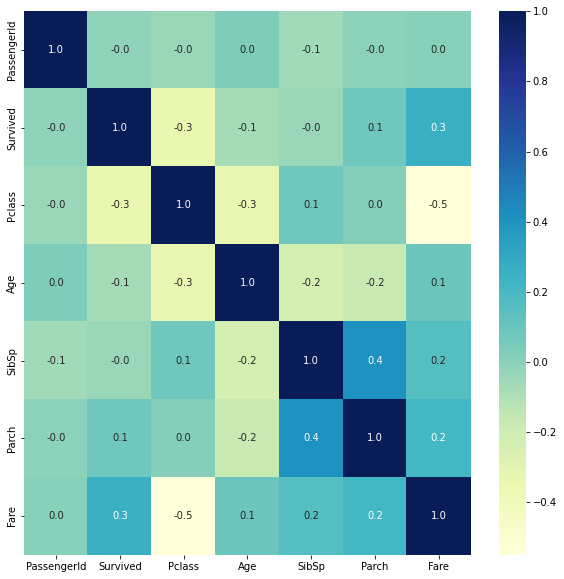

In [227]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cbar=True, cmap='YlGnBu', fmt='.1f');

In [228]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [229]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [230]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [231]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [232]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Data Visualization

In [233]:
# 0 --> Not Survived
# 1 --> Survived

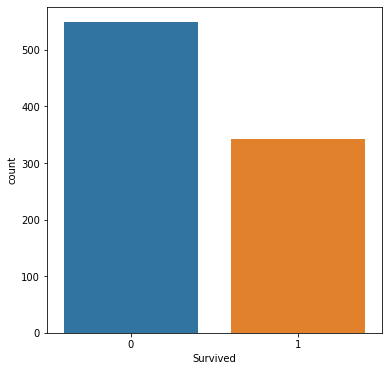

In [234]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Survived', data=data);

## Insight
Number of casualities are more then survivour.

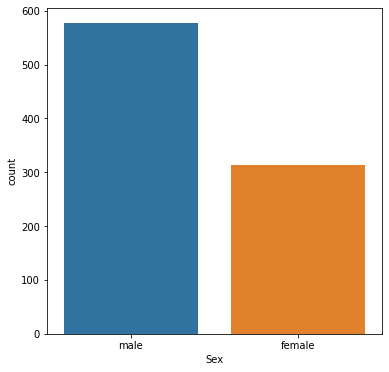

In [235]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Sex', data=data);

## Insight
Male's are more then female's.

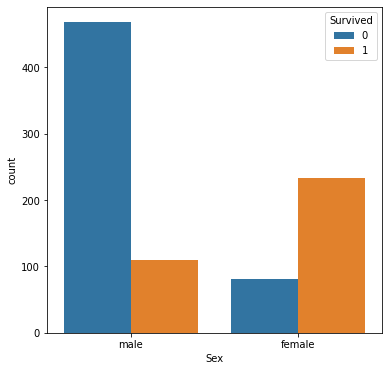

In [236]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Sex', data=data, hue='Survived');

## Insight
Casualities of male's are more then female.

In [237]:
# Pclass
# 1st = class 1
# 2nd = class 2
# 3rd = class 3

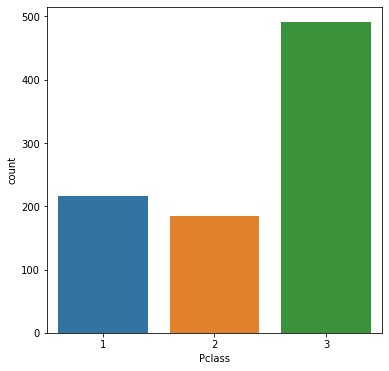

In [238]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Pclass', data=data);

## Insight
class3 people are more then class1 and class2

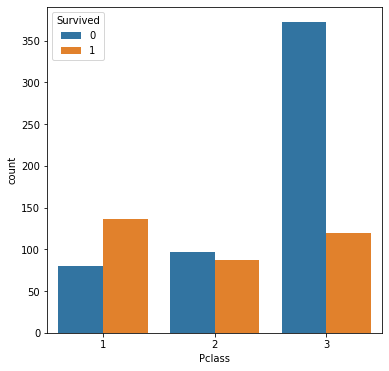

In [239]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Pclass', data=data, hue='Survived');

## Insight
Casualities of class3 people are more then class1 and class2.

In [240]:
# Port of emarkation 
# C = Cherbourg
# Q = Queenstown 
# S = Southampton

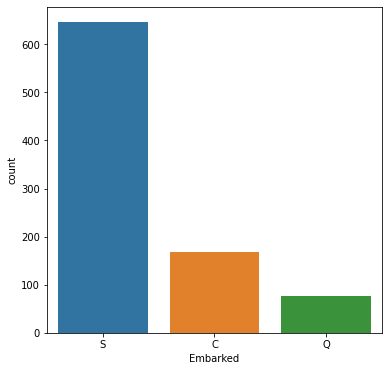

In [241]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Embarked', data=data);

## Insight
Number of casualities are more on southampton port.

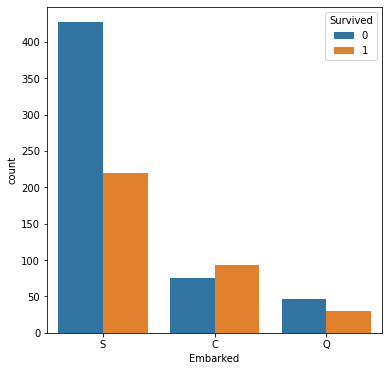

In [242]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Embarked', data=data, hue='Survived');

## Insight
Number of casualities are more on southampton port rather than Cherbourg and Queenstown port. 

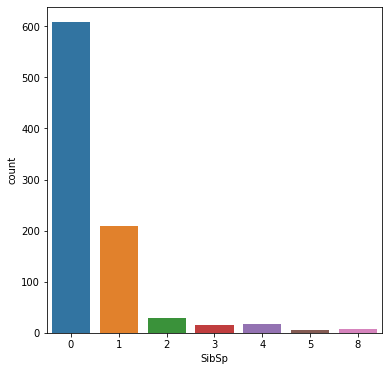

In [243]:
plt.figure(figsize=(6,6))
sns.countplot(x ='SibSp', data=data);

## Insight
More casualities of those who are not related to sibling or spouse.

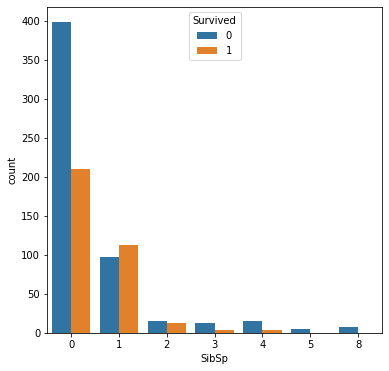

In [244]:
plt.figure(figsize=(6,6))
sns.countplot(x ='SibSp', data=data, hue='Survived');

## Insight
More number of casualities that are not related to sibling or spouse.

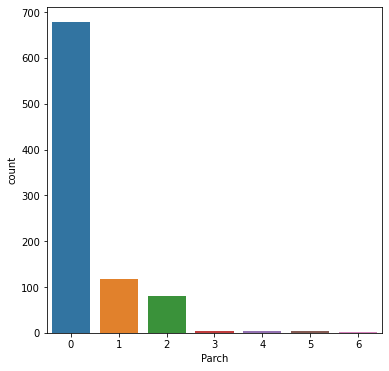

In [245]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Parch', data=data);

## Insight
More casualities of those who are not related to parent or children.

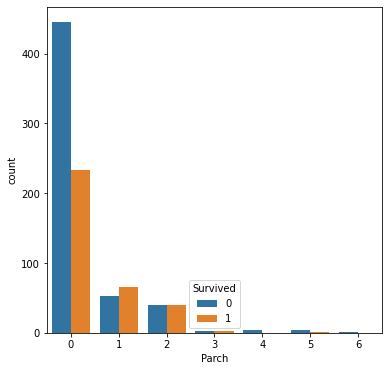

In [246]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Parch', data=data, hue='Survived');

## Insight
More number of casualities that are not related to parent or children.

## Encoding the Categorical Columns

In [247]:
# Replace's the categorical column's with binary value's
data.replace({'Sex': {'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace=True)

In [248]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Seprating Feature and Target Column

In [249]:
X = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = data['Survived']

In [250]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [251]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Splitting the data into training and test data

In [252]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [253]:
print('X :', X.shape)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)

X : (891, 7)
X_train : (712, 7)
X_test : (179, 7)


## Model Training

In [254]:
model = LogisticRegression()

In [255]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## Model Evaluation

In [256]:
X_train_prediction = model.predict(X_train)

In [257]:
X_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [258]:
training_data_acccuracy = accuracy_score(Y_train, X_train_prediction)
training_data_acccuracy

0.8075842696629213

In [259]:
X_test_prediction = model.predict(X_test)
X_test_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [260]:
test_data_acccuracy = accuracy_score(Y_test, X_test_prediction)
test_data_acccuracy

0.7821229050279329

## Errors

In [261]:
mse = mean_squared_error(Y_train, X_train_prediction)
print('Mean Squared Error :', mse)

rmse = np.sqrt(mean_squared_error(Y_train, X_train_prediction))
print('Root Mean Squared Error :', rmse)

Mean Squared Error : 0.19241573033707865
Root Mean Squared Error : 0.4386521746635695


In [262]:
mse = mean_squared_error(Y_test, X_test_prediction)
print('Mean Squared Error :', mse)

rmse = np.sqrt(mean_squared_error(Y_test, X_test_prediction))
print('Root Mean Squared Error :', rmse)

Mean Squared Error : 0.21787709497206703
Root Mean Squared Error : 0.46677306581685607


In [263]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [264]:
data= pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [265]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [266]:
df_train, df_test = train_test_split(data,random_state = 42,test_size = 0.2)

In [267]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


In [268]:
df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


In [269]:
df_train.shape

(712, 12)

#Correlation 

In [270]:
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.246641
Parch          0.078311
PassengerId    0.019979
SibSp         -0.047602
Age           -0.059695
Pclass        -0.321750
Name: Survived, dtype: float64

In [271]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [272]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

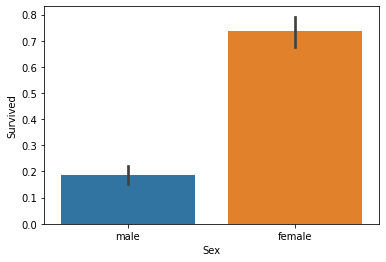

In [274]:
sns.barplot(
    data = df_train,
    x = 'Sex',
    y = 'Survived'
)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


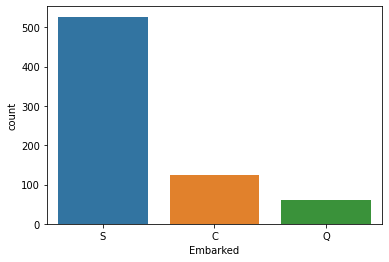

In [275]:
sns.countplot(df_train['Embarked'])

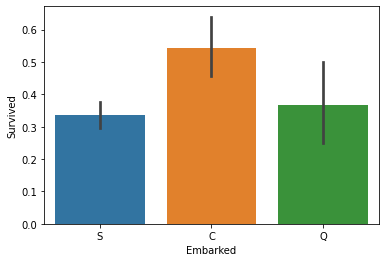

In [276]:
sns.barplot(
    data = df_train,
    x = 'Embarked',
    y = 'Survived',

)
plt.show()

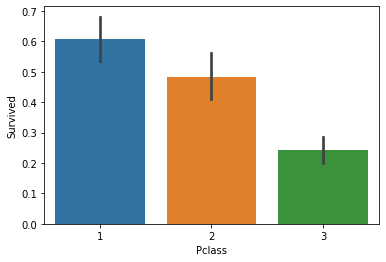

In [277]:
sns.barplot(
    data = df_train,
    x = 'Pclass',
    y = 'Survived',

)
plt.show()

In [278]:
q = ['PassengerId' , 'Name', 'Ticket','Cabin','SibSp','Parch','Age']
df_train_set = df_train.drop(q,axis=1)
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
331,0,1,male,28.5000,S
733,0,2,male,13.0000,S
382,0,3,male,7.9250,S
704,0,3,male,7.8542,S
813,0,3,female,31.2750,S


In [279]:
df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


In [280]:
z = ['Name', 'Ticket','Cabin','SibSp','Parch','Age']
df_test_set = df_test.drop(z,axis=1)
print(df_train_set.head())
df_test_set

     Survived  Pclass     Sex     Fare Embarked
331         0       1    male  28.5000        S
733         0       2    male  13.0000        S
382         0       3    male   7.9250        S
704         0       3    male   7.8542        S
813         0       3  female  31.2750        S


,PassengerId,Survived,Pclass,Sex,Fare,Embarked
709,710,1,3,male,15.2458,C
439,440,0,2,male,10.5000,S
840,841,0,3,male,7.9250,S
720,721,1,2,female,33.0000,S
39,40,1,3,female,11.2417,C
...,...,...,...,...,...,...
433,434,0,3,male,7.1250,S
773,774,0,3,male,7.2250,C
25,26,1,3,female,31.3875,S
84,85,1,2,female,10.5000,S


In [281]:
mean = df_test_set["Fare"].mean()
df_test_set["Fare"] = df_test_set["Fare"].fillna(mean)
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Sex          179 non-null    object 
 4   Fare         179 non-null    float64
 5   Embarked     179 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.8+ KB


In [282]:
df_test_set.drop('PassengerId',axis = 1,inplace =True)

In [283]:
df_train_set

,Survived,Pclass,Sex,Fare,Embarked
331,0,1,male,28.5000,S
733,0,2,male,13.0000,S
382,0,3,male,7.9250,S
704,0,3,male,7.8542,S
813,0,3,female,31.2750,S
...,...,...,...,...,...
106,1,3,female,7.6500,S
270,0,1,male,31.0000,S
860,0,3,male,14.1083,S
435,1,1,female,120.0000,S


In [284]:
df_test_set

,Survived,Pclass,Sex,Fare,Embarked
709,1,3,male,15.2458,C
439,0,2,male,10.5000,S
840,0,3,male,7.9250,S
720,1,2,female,33.0000,S
39,1,3,female,11.2417,C
...,...,...,...,...,...
433,0,3,male,7.1250,S
773,0,3,male,7.2250,C
25,1,3,female,31.3875,S
84,1,2,female,10.5000,S


In [285]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

temp = labelencoder.fit_transform(df_test_set['Sex'])
df_test_set['Sex'] = temp
print(df_test_set)

temp = labelencoder.fit_transform(df_train_set['Sex'])
df_train_set['Sex'] = temp
print(df_train_set)

temp = labelencoder.fit_transform(df_train_set['Embarked'])
df_train_set['Embarked'] = temp
print(df_train_set)

temp = labelencoder.fit_transform(df_test_set['Embarked'])
df_test_set['Embarked'] = temp
print(df_test_set)


     Survived  Pclass  Sex     Fare Embarked
709         1       3    1  15.2458        C
439         0       2    1  10.5000        S
840         0       3    1   7.9250        S
720         1       2    0  33.0000        S
39          1       3    0  11.2417        C
..        ...     ...  ...      ...      ...
433         0       3    1   7.1250        S
773         0       3    1   7.2250        C
25          1       3    0  31.3875        S
84          1       2    0  10.5000        S
10          1       3    0  16.7000        S

[179 rows x 5 columns]
     Survived  Pclass  Sex      Fare Embarked
331         0       1    1   28.5000        S
733         0       2    1   13.0000        S
382         0       3    1    7.9250        S
704         0       3    1    7.8542        S
813         0       3    0   31.2750        S
..        ...     ...  ...       ...      ...
106         1       3    0    7.6500        S
270         0       1    1   31.0000        S
860         0       3 

In [286]:
print(type(df_train_set))
x = df_train_set.drop('Survived',axis = 1)
y = df_train_set['Survived']

<class 'pandas.core.frame.DataFrame'>


In [287]:
x

,Pclass,Sex,Fare,Embarked
331,1,1,28.5000,2
733,2,1,13.0000,2
382,3,1,7.9250,2
704,3,1,7.8542,2
813,3,0,31.2750,2
...,...,...,...,...
106,3,0,7.6500,2
270,1,1,31.0000,2
860,3,1,14.1083,2
435,1,0,120.0000,2


In [288]:
y

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [289]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Fare      712 non-null    float64
 3   Embarked  712 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 44.0 KB


#KNN (K-nearest neighbors)

In [290]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [291]:
k_range = range(1,26)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    y_pred= knn.predict(df_test_set.drop('Survived',axis = 1))
    scores.append(metrics.accuracy_score(df_test_set['Survived'],y_pred))
print(scores)    

[0.7541899441340782, 0.7541899441340782, 0.7541899441340782, 0.7318435754189944, 0.7486033519553073, 0.7262569832402235, 0.7206703910614525, 0.7374301675977654, 0.7430167597765364, 0.7430167597765364, 0.7541899441340782, 0.7318435754189944, 0.7486033519553073, 0.7206703910614525, 0.7486033519553073, 0.7486033519553073, 0.7486033519553073, 0.7430167597765364, 0.7374301675977654, 0.7430167597765364, 0.7486033519553073, 0.7430167597765364, 0.7486033519553073, 0.7318435754189944, 0.7541899441340782]


Text(0, 0.5, 'Testing Accuracy')

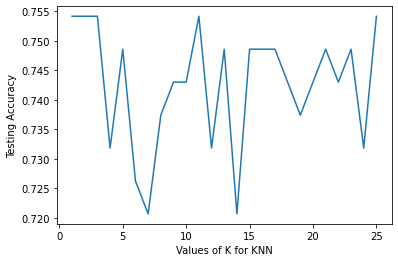

In [292]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores)
plt.xlabel('Values of K for KNN')
plt.ylabel('Testing Accuracy')

In [293]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)
y_pred= knn.predict(df_test_set.drop('Survived',axis = 1))
metrics.accuracy_score(df_test_set['Survived'],y_pred)

0.7541899441340782

In [294]:
error_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y)
    pred_i=knn.predict(x)
    error_rate.append(np.mean(pred_i!=y))

Text(0, 0.5, 'error rate')

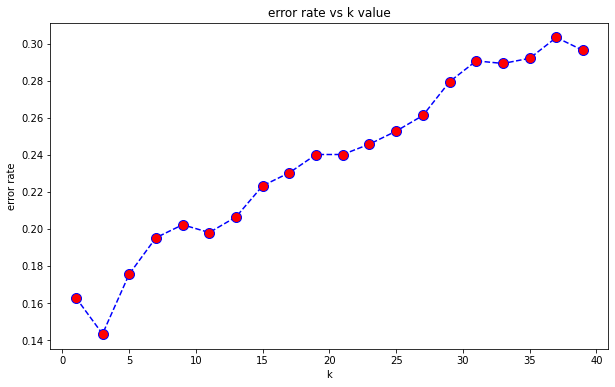

In [295]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('error rate vs k value')
plt.xlabel('k')
plt.ylabel('error rate')

# Random Forest & Dicision Tree

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
data= pd.read_csv('Titanic.csv')
data.head()
data.dropna(inplace = True)

In [298]:
#label Encoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(data['Sex'])
label.fit(data['Ticket'])
label.fit(data['Cabin'])
rn=label.fit_transform(data['Sex'])
ab=label.fit_transform(data['Ticket'])
cd=label.fit_transform(data['Cabin'])
data['Sex']=rn
data['Ticket']=ab
data['Cabin']=cd
y=data["Embarked"]
x = data.drop(columns = ['Name','Embarked'])

In [299]:
print(x)
print(y)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  \
1              2         1       1    0  38.0      1      0     109  71.2833   
3              4         1       1    0  35.0      1      0      31  53.1000   
6              7         0       1    1  54.0      0      0      55  51.8625   
10            11         1       3    0   4.0      1      1     120  16.7000   
11            12         1       1    0  58.0      0      0      26  26.5500   
..           ...       ...     ...  ...   ...    ...    ...     ...      ...   
871          872         1       1    0  47.0      1      1      33  52.5542   
872          873         0       1    1  33.0      0      0      89   5.0000   
879          880         1       1    0  56.0      0      1      38  83.1583   
887          888         1       1    0  19.0      0      0      10  30.0000   
889          890         1       1    1  26.0      0      0       8  30.0000   

     Cabin  
1       72  
3       48  


In [300]:
print(x.shape)
print(y.shape)

(183, 10)
(183,)


In [301]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [302]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [303]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [304]:
model.score(x_test, y_test)

0.7391304347826086

In [305]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.717391304347826

In [306]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [307]:
y_pred=dt.predict(x_test)
y_pred

array(['C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'C', 'S',
       'S', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'C', 'C', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S',
       'C', 'C', 'C', 'C', 'S', 'C', 'C'], dtype=object)

In [308]:
y_pred
#classification reort for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred)
print('Classification Report : \n',matrix)

Classification Report : 
               precision    recall  f1-score   support

           C       0.78      0.74      0.76        19
           S       0.82      0.85      0.84        27

    accuracy                           0.80        46
   macro avg       0.80      0.79      0.80        46
weighted avg       0.80      0.80      0.80        46

